<a href="https://colab.research.google.com/github/Pavitra-khare/DA6401_Deep_learning/blob/main/DA6401_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 134.7 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 258.9 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 146.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.4/670.4 kB 200.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.8/335.8 kB 178.3 kB/s eta 0:00:0000:0100:01


In [ ]:
!pip install tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 167.4 kB/s eta 0:00:0000:0100:39
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 225.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 159.4 kB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 202.9 kB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 121.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 186.8 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 164.7 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: ml-dtypes
    Found existing installation: ml_dtypes 0.5.1
    Uninstalling ml_dtypes-0.5.1:
      Successfully uninstalled ml_dtypes-0.5.1


In [ ]:
!pip install wandb

In [ ]:
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: 3628-pavitrakhare (3628-pavitrakhare-indian-institute-of-technology-madras) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


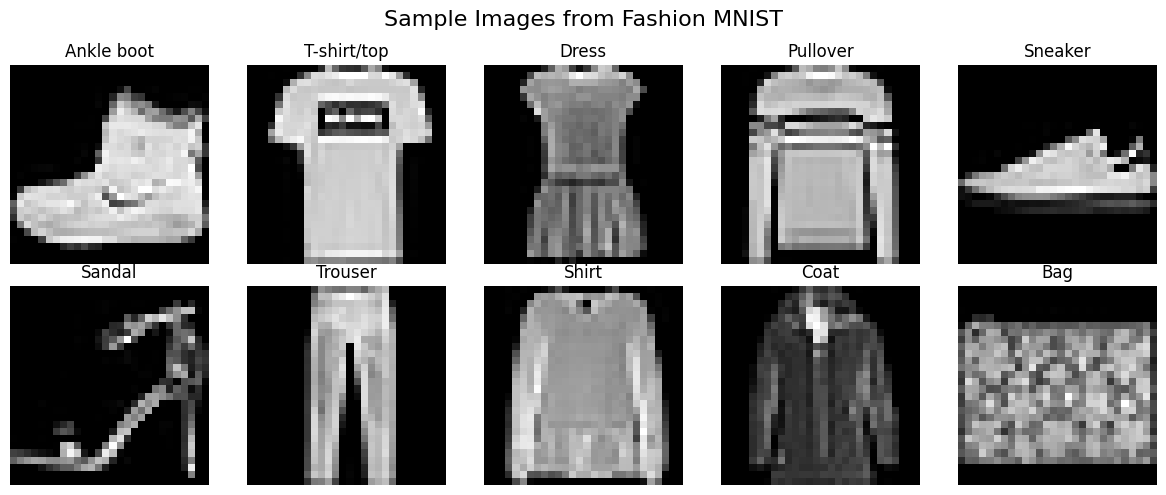

In [ ]:
import os
import wandb
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Initialize Weights & Biases (W&B) for experiment tracking
wandb.init(project="DA6401_ASS-1", name="Question-1")

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Define class names for Fashion MNIST
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

# Select one sample image for each class
selected_images = []
selected_labels = set()

for i, label in enumerate(train_labels):
    if label not in selected_labels:
        selected_images.append((train_images[i], class_names[label]))
        selected_labels.add(label)
    if len(selected_images) == 10:
        break

# Plot sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
fig.suptitle("Sample Images from Fashion MNIST", fontsize=16)

for ax, (image, label) in zip(axes.flatten(), selected_images):
    ax.imshow(image, cmap='gray')
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Log the figure to W&B
wandb.log({"Sample MNIST Images": fig})
wandb.finish()


# QUESTION 2

In [ ]:
import numpy as np

# Activation functions
def sigmoid(x):
    """Computes the sigmoid activation."""
    return 1 / (1 + np.exp(-x))

def tanh(x):
    """Computes the hyperbolic tangent activation."""
    return np.tanh(x)

def relu(x):
    """Computes the ReLU activation."""
    return np.where(x > 0, x, 0)

def softmax(x):
    """
    Computes the softmax activation.

    Parameters:
    - x: Input array.

    Returns:
    - Softmax-transformed output.
    """
    x_shifted = x - np.max(x, axis=1, keepdims=True)  # Improve numerical stability
    exp_x = np.exp(x_shifted)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Loss functions
def cross_entropy(y_hat, y):
    """
    Computes the cross-entropy loss.

    Parameters:
    - y_hat: Predicted probabilities.
    - y: True labels (one-hot encoded).

    Returns:
    - Cross-entropy loss value.
    """
    epsilon = 1e-9  # Small constant to prevent log(0)
    return -np.sum(y * np.log(y_hat + epsilon)) / len(y_hat)

def mean_squared_error(y_hat, y):
    """
    Computes the mean squared error (MSE).

    Parameters:
    - y_hat: Predicted values.
    - y: True values.

    Returns:
    - MSE loss.
    """
    return np.mean((y - y_hat) ** 2)

# Activation function selector
def activation_functions(x, fn_label="sigmoid"):
    """
    Applies the specified activation function.

    Parameters:
    - x: Input array.
    - fn_label: Activation function name.

    Returns:
    - Activated output.
    """
    activations = {
        "ReLU": relu,
        "sigmoid": sigmoid,
        "tanh": tanh,
        "softmax": softmax
    }
    return activations.get(fn_label, lambda x: "error")(x)

# Derivatives of activation functions
def activation_derivative(x, fn_label="sigmoid"):
    """
    Computes the derivative of the specified activation function.

    Parameters:
    - x: Input array.
    - fn_label: Activation function name.

    Returns:
    - Derivative of the function.
    """
    derivatives = {
        "ReLU": lambda x: (x > 0).astype(float),
        "tanh": lambda x: 1 - np.tanh(x) ** 2,
        "sigmoid": lambda x: sigmoid(x) * (1 - sigmoid(x))
    }
    return derivatives.get(fn_label, lambda x: "error")(x)


In [ ]:
import numpy as np
from keras.datasets import fashion_mnist, mnist
from sklearn.model_selection import train_test_split

# Configuration Parameters
DATASET_NAME = 'fashion_mnist'  # Change to 'mnist' if needed
BETA_1 = 0.9
BETA_2 = 0.999
MOMENTUM_BETA = 0.9
RMSPROP_BETA = 0.9
EPSILON = 1e-3
WEIGHT_DECAY = 0

# Constants
INPUT_KEY = 'input_size'
OUTPUT_KEY = 'output_size'
FUN_KEY = "function"

def one_hot_encode(labels, num_classes=None):
    """
    Converts label vector into a one-hot encoded matrix.

    Parameters:
    - labels (array): Array of class labels.
    - num_classes (int): Number of unique classes. If None, inferred from labels.

    Returns:
    - np.ndarray: One-hot encoded matrix.
    """
    num_classes = num_classes or (max(labels) + 1)
    one_hot_matrix = np.zeros((len(labels), num_classes))
    one_hot_matrix[np.arange(len(labels)), labels] = 1
    return one_hot_matrix

# Load the selected dataset
if DATASET_NAME == 'fashion_mnist':
    (train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()
elif DATASET_NAME == 'mnist':
    (train_X, train_Y), (test_X, test_Y) = mnist.load_data()
else:
    raise ValueError("Invalid dataset name. Choose 'fashion_mnist' or 'mnist'.")

# Normalize pixel values to range [0,1]
train_X, test_X = train_X / 255.0, test_X / 255.0

# Split dataset into training and validation sets
train_X, val_X, train_Y, val_Y = train_test_split(train_X, train_Y, test_size=0.1, random_state=40)

# Reshape images into 1D feature vectors
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)
val_X = val_X.reshape(val_X.shape[0], -1)

# Ensure data is a multiple of batch size (128)
BATCH_SIZE = 128
train_X = train_X[:(len(train_X) // BATCH_SIZE) * BATCH_SIZE, :]
test_X = test_X[:(len(test_X) // BATCH_SIZE) * BATCH_SIZE, :]
val_X = val_X[:(len(val_X) // BATCH_SIZE) * BATCH_SIZE, :]

train_Y = train_Y[:(len(train_Y) // BATCH_SIZE) * BATCH_SIZE]
test_Y = test_Y[:(len(test_Y) // BATCH_SIZE) * BATCH_SIZE]
val_Y = val_Y[:(len(val_Y) // BATCH_SIZE) * BATCH_SIZE]

# Convert labels to one-hot encoded format
train_Y = one_hot_encode(train_Y)
test_Y = one_hot_encode(test_Y)
val_Y = one_hot_encode(val_Y)

# Define input and output layer sizes
input_layer_size = train_X.shape[1]
output_layer_size = train_Y.shape[1]

# Output dataset information
print(f"Training Data: {train_X.shape}, Labels: {train_Y.shape}")
print(f"Validation Data: {val_X.shape}, Labels: {val_Y.shape}")
print(f"Test Data: {test_X.shape}, Labels: {test_Y.shape}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training Data: (53888, 784), Labels: (53888, 10)
Validation Data: (5888, 784), Labels: (5888, 10)
Test Data: (9984, 784), Labels: (9984, 10)


In [ ]:
def forward_propagation(input_x, W, B, hidden_layers, activ_label, op_label):
    """
    Performs forward propagation through a neural network.

    Parameters:
    - input_x (array): Input data.
    - W (list): List of weight matrices.
    - B (list): List of bias vectors.
    - hidden_layers (int): Number of hidden layers.
    - activ_label (str): Activation function for hidden layers.
    - op_label (str): Activation function for the output layer.

    Returns:
    - tuple: Lists containing activations (a) and hidden states (h) for all layers.
    """

    # Initialize lists for activations and hidden states
    a, h = [], []

    # Reshape input data into a 2D matrix if necessary
    batch_trainX = np.reshape(input_x, (len(input_x), -1))

    # Compute first layer's activation and output
    a1 = np.dot(W[0], batch_trainX.T) + B[0]
    h1 = activation_functions(a1, activ_label)

    a.append(a1.T)
    h.append(h1.T)

    # Compute activations and outputs for hidden layers
    for i in range(1, hidden_layers):
        an = np.dot(W[i], h[i - 1].T) + B[i]
        hn = activation_functions(an, activ_label)

        a.append(an.T)
        h.append(hn.T)

    # Compute activation and output for the final layer
    aL = np.dot(W[hidden_layers], h[-1].T) + B[hidden_layers]
    hL = activation_functions(aL.T, op_label)

    a.append(aL.T)
    h.append(hL)

    return a, h


# QUESTION 3


In [ ]:
def initialize_weights_and_biases(layers, number_hidden_layers=1, init_type='random'):
    """
    Initializes weights and biases for a neural network.

    Parameters:
    - layers (list): A list of dictionaries defining layer configurations (input and output sizes).
    - number_hidden_layers (int): The count of hidden layers in the network (default: 1).
    - init_type (str): Specifies the initialization method ('random' or 'Xavier').

    Returns:
    - weights (list): List of weight matrices for each layer.
    - biases (list): List of bias vectors for each layer.
    """

    weights, biases = [], []
    OUTPUT_KEY = "output_size"
    INPUT_KEY = "input_size"

    for i in range(number_hidden_layers + 1):
        input_size = layers[i][INPUT_KEY]
        output_size = layers[i][OUTPUT_KEY]

        if init_type == 'random':
            weights.append(np.random.normal(0, 0.5, (output_size, input_size)))
            biases.append(np.random.normal(0, 0.5, (output_size, 1)))
        else:
            # Xavier Initialization
            limit = np.sqrt(6 / (input_size + output_size))
            weights.append(np.random.uniform(-limit, limit, size=(output_size, input_size)))
            biases.append(np.random.uniform(-limit, limit, size=(output_size, 1)))

    return weights, biases



In [ ]:
# def calculate_error(actual, predicted):
#     samples = actual.shape[0]
#     return -np.sum(actual * np.log(predicted + 1e-8)) / samples

In [ ]:
# def activation_sigmoid_derivative(x):
#     return x * (1 - x)

In [ ]:
def train_accuracy(batch_testy, y_predicted, trainy):
    """
    Computes the training accuracy by comparing predicted and actual labels.

    Parameters:
    - batch_testy (list/array): True labels in one-hot encoded format.
    - y_predicted (list/array): Predicted probability distributions.
    - trainy (list/array): Training labels (for normalization of accuracy).

    Returns:
    - float: Training accuracy as a fraction of correctly predicted samples.
    """

    correct_predictions = 0

    for i in range(len(batch_testy)):
        for j in range(len(batch_testy[i])):
            true_label = np.argmax(batch_testy[i][j])  # Get index of the correct class
            predicted_label = np.argmax(y_predicted[i][j])  # Get index of the highest probability

            if predicted_label == true_label:
                correct_predictions += 1

    return correct_predictions / len(trainy)


In [ ]:
def test_accuracy(testX, testy, weights, biases, number_hidden_layers, activation_function, output_function):
    """
    Computes the accuracy of a neural network model on test data.

    Parameters:
    - testX (array): Input test data.
    - testy (array): True test labels.
    - weights (list): List of weight matrices for each layer.
    - biases (list): List of bias vectors for each layer.
    - number_hidden_layers (int): Number of hidden layers in the network.
    - activation_function (str): Activation function used in hidden layers.
    - output_function (str): Activation function for the output layer.

    Returns:
    - float: Test accuracy as a fraction of correctly predicted samples.
    """

    # Perform forward propagation to get predictions
    _, activations = forward_propagation(testX, weights, biases, number_hidden_layers, activation_function, output_function)

    # Extract output layer predictions
    y_pred = activations[-1]

    # Convert probabilities to class predictions
    y_predicted = np.argmax(y_pred, axis=1)

    # Compute accuracy
    accuracy = np.mean(y_predicted == testy)

    return accuracy


In [ ]:
import numpy as np

def backward_propagation(batch_trainy, batch_trainX, y_hat, a, h, weights, number_hidden_layers, derivative_function='sigmoid'):
    """
    Performs backpropagation to compute gradients of weights and biases.

    Parameters:
    - batch_trainy: True labels (one-hot encoded).
    - batch_trainX: Input training data.
    - y_hat: Predicted output.
    - a: List of activation values from forward propagation.
    - h: List of hidden state values.
    - weights: List of weight matrices.
    - number_hidden_layers: Number of hidden layers in the network.
    - derivative_function: Activation function for computing derivatives.

    Returns:
    - del_W: Dictionary of gradients for weights.
    - del_b: Dictionary of gradients for biases.
    """
    del_a, del_W, del_b, del_h = {}, {}, {}, {}

    batch_trainy = batch_trainy.reshape(batch_trainy.shape[0], batch_trainy.shape[1])

    epsilon = 1e-8
    last_layer_a = f'a{number_hidden_layers + 1}'
    last_layer_h = f'h{number_hidden_layers + 1}'

    del_a[last_layer_a] = -(batch_trainy - y_hat)
    del_h[last_layer_h] = -(batch_trainy / (y_hat + epsilon))

    num_samples = len(batch_trainX)

    # Backpropagation from the output layer to the first hidden layer
    for i in range(number_hidden_layers + 1, 1, -1):
        weight_key = f'W{i}'
        bias_key = f'b{i}'
        activation_key = f'a{i}'
        prev_activation_key = f'a{i-1}'
        prev_hidden_key = f'h{i-1}'

        # Compute gradient of weights using del_a and hidden activations
        del_W[weight_key] = np.dot(del_a[activation_key].T, h[i - 2])

        # L2 regularization
        del_W[weight_key] += wdc * weights[i - 1]
        del_W[weight_key] /= num_samples

        # Compute gradient of biases
        del_b[bias_key] = del_a[activation_key]

        # Compute del_h and del_a for the previous layer
        del_h[prev_hidden_key] = np.dot(weights[i - 1].T, del_a[activation_key].T)
        del_a[prev_activation_key] = np.multiply(del_h[prev_hidden_key], activation_derivative(a[i - 2].T, derivative_function))
        del_a[prev_activation_key] = del_a[prev_activation_key].T

    # Compute gradients for the first layer (no del_h or del_a needed)
    del_W['W1'] = np.dot(del_a['a1'].T, batch_trainX)
    del_b['b1'] = del_a['a1']

    # Normalize biases over the number of samples
    for j in range(1, len(del_b) + 1):
        bias_key = f'b{j}'
        bias_grad = np.mean(del_b[bias_key], axis=0).reshape(-1, 1)
        del_b[bias_key] = bias_grad

    return del_W, del_b


In [ ]:
# X_train = images[:5].reshape(5, -1)  # Flatten images
# y_train = np.eye(10)[labels_index[:5]]  # One-hot encode labels

# parameters = setup_model_params(X_train.shape[1], [128, 64], 10)

# for epoch in range(10):
#     parameters = backpropagate(X_train, y_train, parameters, [128, 64], optimizer="adam", learning_rate=0.01)
#     predictions = forward_pass(X_train, parameters, [128, 64])[f"A{len([128, 64]) + 1}"]  # Ensure correct indexing
#     loss = calculate_error(y_train, predictions)
#     print(f"Epoch {epoch + 1}, Loss: {loss:.4f}")


Epoch 1, Loss: 1.3602
Epoch 2, Loss: 1.2778
Epoch 3, Loss: 1.1213
Epoch 4, Loss: 1.2231
Epoch 5, Loss: 1.0618
Epoch 6, Loss: 1.0684
Epoch 7, Loss: 0.9595
Epoch 8, Loss: 0.7840
Epoch 9, Loss: 0.8232
Epoch 10, Loss: 0.6037


# QUES 3

In [ ]:
import numpy as np

def calculate_regularizing_term(y, weight_decay_const, number_hidden_layers, weights):
    """
    Computes the L2 regularization term.

    Parameters:
    - y: True labels (for determining the number of samples).
    - weight_decay_const: Regularization constant (λ).
    - number_hidden_layers: Number of hidden layers in the network.
    - weights: List of weight matrices.

    Returns:
    - reg_term: Computed regularization term.
    """
    reg_term = sum(np.sum(w**2) for w in weights[:number_hidden_layers + 1])
    return (weight_decay_const / (2 * len(y))) * reg_term


In [ ]:
def val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function):
    """
    Computes validation loss based on the specified loss function.

    Parameters:
    - valX: Validation input data.
    - valy: True labels for validation data.
    - weights: List of weight matrices.
    - biases: List of bias vectors.
    - number_hidden_layers: Number of hidden layers in the network.
    - activation_function: Activation function for hidden layers.
    - output_function: Activation function for the output layer.
    - loss_function: Type of loss function ('cross_entropy' or 'mean_squared_error').

    Returns:
    - error: Computed validation loss.
    """
    _, h = forward_propagation(valX, weights, biases, number_hidden_layers, activation_function, output_function)
    y_hat = h[-1]

    if loss_function == 'cross_entropy':
        return cross_entropy(y_hat, valy)
    elif loss_function == 'mean_squared_error':
        return mean_squared_error(y_hat, valy)
    else:
        raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")


In [ ]:
def gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1,
                     initial_weights='random', activation_function='sigmoid', epochs=1,
                     output_function='softmax', mini_batch_size=4, loss_function='cross_entropy',
                     weight_decay_const=0, wandb_flag=False):
    """
    Implements the gradient descent optimization algorithm for training a neural network.

    Parameters:
    - trainX: Training input data.
    - trainy: Training labels.
    - number_hidden_layers: Number of hidden layers in the network.
    - hidden_layer_size: Number of neurons in each hidden layer.
    - eta: Learning rate for weight updates.
    - initial_weights: Initialization method for weights ('random' or pre-trained values).
    - activation_function: Activation function for hidden layers.
    - epochs: Number of training iterations.
    - output_function: Activation function for the output layer.
    - mini_batch_size: Size of mini-batches for training.
    - loss_function: Type of loss function ('cross_entropy' or 'mean_squared_error').
    - weight_decay_const: Weight decay constant for L2 regularization.
    - wandb_flag: Flag to log training metrics using Weights & Biases.

    Returns:
    - y_pred: Predicted output after final training iteration.
    - weights: Updated weight matrices.
    - biases: Updated bias vectors.
    - plot_lists: Lists of training loss, validation loss, training accuracy, and validation accuracy.
    """

    # Define the architecture of the network
    layers = [
        {INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}
    ]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    # Compute number of mini-batches
    x_val = len(trainX)
    number_batches = x_val // mini_batch_size

    # Split training data into mini-batches
    mini_batch_trainX = np.array_split(trainX, number_batches)
    mini_batch_trainy = np.array_split(trainy, number_batches)

    # Lists to store training progress
    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []

    for epoch in range(epochs):
        total_train_loss = 0
        y_predicted = []

        for batch_X, batch_y in zip(mini_batch_trainX, mini_batch_trainy):
            # Forward propagation
            a, h = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_predicted.append(h[-1])

            # Compute loss
            if loss_function == 'cross_entropy':
                total_train_loss += cross_entropy(h[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                total_train_loss += mean_squared_error(h[-1], batch_y)
            else:
                raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

            # Backward propagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h[-1], a, h, weights, number_hidden_layers, activation_function)

            # Update weights and biases using gradient descent
            for i in range(len(weights)):
                weights[i] -= eta * del_W[f'W{i+1}']
                biases[i] -= eta * del_b[f'b{i+1}']

        # Compute training loss with regularization
        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        train_loss = total_train_loss / number_batches + reg_term_train

        # Compute validation loss
        val_loss = val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valy, weight_decay_const, number_hidden_layers, weights)
        val_loss += reg_term_val

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}")

        # Store metrics
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        train_acc_list.append(train_accuracy(mini_batch_trainy, y_predicted, trainy))
        val_acc_list.append(test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function))

        # Log metrics using Weights & Biases if enabled
        if wandb_flag:
            wandb.log({
                "loss": train_loss,
                "val_loss": val_loss,
                "accuracy": train_acc_list[-1],
                "val_accuracy": val_acc_list[-1],
                "epoch": epoch + 1
            })

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [ ]:


def momentum_based_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1,
                                    initial_weights='random', activation_function='sigmoid', epochs=1,
                                    output_function='softmax', mini_batch_size=4, loss_function='cross_entropy',
                                    weight_decay_const=0, m_beta=0.9, wandb_flag=False):
    """
    Implements Momentum-Based Gradient Descent for training a neural network.
    """
    # Initialize layers of the neural network
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    number_batches = len(trainX) // mini_batch_size
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)
    mini_batch_trainX = np.array_split(trainX, number_batches)
    mini_batch_trainy = np.array_split(trainy, number_batches)

    past_weights = [np.zeros_like(w) for w in weights]
    past_biases = [np.zeros_like(b) for b in biases]

    # Lists to store training progress
    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []

    for epoch in range(epochs):
        total_train_loss = 0
        y_predicted = []

        for batch_X, batch_y in zip(mini_batch_trainX, mini_batch_trainy):
            # Forward propagation
            a, h = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_predicted.append(h[-1])

            # Compute loss
            if loss_function == 'cross_entropy':
                total_train_loss += cross_entropy(h[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                total_train_loss += mean_squared_error(h[-1], batch_y)
            else:
                raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

            # Backward propagation
            del_W, del_b = backward_propagation(batch_y, batch_X, h[-1], a, h, weights, number_hidden_layers, activation_function)

            # Update weights and biases using momentum-based gradient descent
            for i in range(len(weights)):
                past_weights[i] = (m_beta * past_weights[i]) + (eta * del_W[f'W{i+1}'])
                past_biases[i] = (m_beta * past_biases[i]) + (eta * del_b[f'b{i+1}'])

                weights[i] -= past_weights[i]
                biases[i] -= past_biases[i]

        # Compute training and validation losses
        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        train_loss = (total_train_loss / number_batches) + reg_term_train
        val_loss = val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        val_loss += calculate_regularizing_term(valy, weight_decay_const, number_hidden_layers, weights)

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss:.4f}")

        # Compute accuracies
        train_acc = train_accuracy(mini_batch_trainy, y_predicted, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        # Store metrics
        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        # Log metrics using Weights & Biases if enabled
        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [ ]:


def nestrov_accelerated_gradient_descent(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1,
                                          initial_weights='random', activation_function='sigmoid', epochs=1,
                                          output_function='softmax', mini_batch_size=4, loss_function='cross_entropy',
                                          weight_decay_const=0, m_beta=0.9, wandb_flag=False):
    """
    Implements Nesterov Accelerated Gradient Descent for training a neural network.
    """
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)
    number_batches = len(trainX) // mini_batch_size

    mini_batch_trainX = np.array_split(trainX, number_batches)
    mini_batch_trainy = np.array_split(trainy, number_batches)

    past_weights = [np.zeros_like(w) for w in weights]
    past_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    h = None

    for epoch in range(epochs):
        total_train_loss = 0
        y_predicted = []

        for batch_X, batch_y in zip(mini_batch_trainX, mini_batch_trainy):
            lookahead_weights = [w - (m_beta * pw) for w, pw in zip(weights, past_weights)]
            lookahead_biases = [b - (m_beta * pb) for b, pb in zip(biases, past_biases)]

            a, h = forward_propagation(batch_X, lookahead_weights, lookahead_biases, number_hidden_layers, activation_function, output_function)
            y_predicted.append(h[-1])

            if loss_function == 'cross_entropy':
                total_train_loss += cross_entropy(h[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                total_train_loss += mean_squared_error(h[-1], batch_y)
            else:
                raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

            del_W, del_b = backward_propagation(batch_y, batch_X, h[-1], a, h, lookahead_weights, number_hidden_layers, activation_function)

            for i in range(len(weights)):
                past_weights[i] = (m_beta * past_weights[i]) + (eta * del_W[f'W{i+1}'])
                past_biases[i] = (m_beta * past_biases[i]) + (eta * del_b[f'b{i+1}'])

                weights[i] -= past_weights[i]
                biases[i] -= past_biases[i]

        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        train_loss = (total_train_loss / number_batches) + reg_term_train
        val_loss_value = val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value += reg_term_val

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        train_acc = train_accuracy(mini_batch_trainy, y_predicted, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [ ]:
import numpy as np

def rmsprop(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
            activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
            loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):
    """
    Implements RMSprop optimization for training a neural network.
    """
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    number_batches = len(trainX) // mini_batch_size
    mini_batch_trainX = np.array_split(trainX, number_batches)
    mini_batch_trainy = np.array_split(trainy, number_batches)

    v_weights = [np.zeros_like(w) for w in weights]
    v_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    h = None

    for epoch in range(epochs):
        total_train_loss = 0
        y_predicted = []

        for batch_X, batch_y in zip(mini_batch_trainX, mini_batch_trainy):
            a, h = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_predicted.append(h[-1])

            if loss_function == 'cross_entropy':
                total_train_loss += cross_entropy(h[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                total_train_loss += mean_squared_error(h[-1], batch_y)
            else:
                raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

            del_W, del_b = backward_propagation(batch_y, batch_X, h[-1], a, h, weights, number_hidden_layers, activation_function)

            for i in range(len(weights)):
                v_weights[i] = (rmsprop_beta * v_weights[i]) + ((1 - rmsprop_beta) * (del_W[f'W{i+1}'] ** 2))
                v_biases[i] = (rmsprop_beta * v_biases[i]) + ((1 - rmsprop_beta) * (del_b[f'b{i+1}'] ** 2))

                weights[i] -= (eta * del_W[f'W{i+1}']) / (np.sqrt(v_weights[i]) + epsilon_)
                biases[i] -= (eta * del_b[f'b{i+1}']) / (np.sqrt(v_biases[i]) + epsilon_)

        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        train_loss = (total_train_loss / number_batches) + reg_term_train

        val_loss_value = val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value += reg_term_val

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        train_acc = train_accuracy(mini_batch_trainy, y_predicted, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]

In [ ]:
import numpy as np

def adam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
         activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
         loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):
    """
    Implements the Adam optimization algorithm for training a neural network.
    """
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    number_batches = len(trainX) // mini_batch_size
    mini_batch_trainX = np.array_split(trainX, number_batches)
    mini_batch_trainy = np.array_split(trainy, number_batches)

    # Initialize first and second moment vectors
    m_weights = [np.zeros_like(w) for w in weights]
    m_biases = [np.zeros_like(b) for b in biases]
    v_weights = [np.zeros_like(w) for w in weights]
    v_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    h = None
    beta1, beta2 = 0.9, 0.999
    epsilon_ = 1e-8

    for epoch in range(epochs):
        total_train_loss = 0
        y_predicted = []
        t = 0  # Time step for bias correction

        for batch_X, batch_y in zip(mini_batch_trainX, mini_batch_trainy):
            t += 1
            a, h = forward_propagation(batch_X, weights, biases, number_hidden_layers, activation_function, output_function)
            y_predicted.append(h[-1])

            if loss_function == 'cross_entropy':
                total_train_loss += cross_entropy(h[-1], batch_y)
            elif loss_function == 'mean_squared_error':
                total_train_loss += mean_squared_error(h[-1], batch_y)
            else:
                raise ValueError("Invalid loss function. Choose 'cross_entropy' or 'mean_squared_error'.")

            del_W, del_b = backward_propagation(batch_y, batch_X, h[-1], a, h, weights, number_hidden_layers, activation_function)

            for i in range(len(weights)):
                m_weights[i] = beta1 * m_weights[i] + (1 - beta1) * del_W[f'W{i+1}']
                m_biases[i] = beta1 * m_biases[i] + (1 - beta1) * del_b[f'b{i+1}']

                v_weights[i] = beta2 * v_weights[i] + (1 - beta2) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta2 * v_biases[i] + (1 - beta2) * (del_b[f'b{i+1}'] ** 2)

                m_hat_weights = m_weights[i] / (1 - beta1 ** t)
                m_hat_biases = m_biases[i] / (1 - beta1 ** t)

                v_hat_weights = v_weights[i] / (1 - beta2 ** t)
                v_hat_biases = v_biases[i] / (1 - beta2 ** t)

                weights[i] -= eta * m_hat_weights / (np.sqrt(v_hat_weights) + epsilon_)
                biases[i] -= eta * m_hat_biases / (np.sqrt(v_hat_biases) + epsilon_)

        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        train_loss = (total_train_loss / number_batches) + reg_term_train

        val_loss_value = val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value += reg_term_val

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        train_acc = train_accuracy(mini_batch_trainy, y_predicted, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]


In [ ]:
import numpy as np

def nadam(trainX, trainy, number_hidden_layers=1, hidden_layer_size=4, eta=0.1, initial_weights='random',
          activation_function='sigmoid', epochs=1, output_function='softmax', mini_batch_size=4,
          loss_function='cross_entropy', weight_decay_const=0, wandb_flag=False):
    """
    Implements the NAdam optimization algorithm for training a neural network.
    """
    layers = [{INPUT_KEY: input_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function}]

    for _ in range(number_hidden_layers - 1):
        layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: hidden_layer_size, FUN_KEY: activation_function})

    layers.append({INPUT_KEY: hidden_layer_size, OUTPUT_KEY: output_layer_size, FUN_KEY: output_function})

    # Initialize weights and biases
    weights, biases = initialize_weights_and_biases(layers, number_hidden_layers, initial_weights)

    number_batches = len(trainX) // mini_batch_size
    mini_batch_trainX = np.array_split(trainX, number_batches)
    mini_batch_trainy = np.array_split(trainy, number_batches)

    # Initialize moment vectors
    m_weights = [np.zeros_like(w) for w in weights]
    m_biases = [np.zeros_like(b) for b in biases]
    v_weights = [np.zeros_like(w) for w in weights]
    v_biases = [np.zeros_like(b) for b in biases]

    train_loss_list, val_loss_list, train_acc_list, val_acc_list = [], [], [], []
    h = None
    beta1, beta2 = 0.9, 0.999
    epsilon_ = 1e-8

    for epoch in range(epochs):
        total_train_loss = 0
        y_predicted = []
        t = 0  # Time step for bias correction

        for batch_X, batch_y in zip(mini_batch_trainX, mini_batch_trainy):
            t += 1

            # Lookahead step
            m_hat_weights = [(beta1 * m) / (1 - beta1 ** t) for m in m_weights]
            m_hat_biases = [(beta1 * b) / (1 - beta1 ** t) for b in m_biases]
            v_hat_weights = [(beta2 * v) / (1 - beta2 ** t) for v in v_weights]
            v_hat_biases = [(beta2 * v) / (1 - beta2 ** t) for v in v_biases]

            adjusted_weights = [w - eta * m / (np.sqrt(v) + epsilon_) for w, m, v in zip(weights, m_hat_weights, v_hat_weights)]
            adjusted_biases = [b - eta * m / (np.sqrt(v) + epsilon_) for b, m, v in zip(biases, m_hat_biases, v_hat_biases)]

            a, h = forward_propagation(batch_X, adjusted_weights, adjusted_biases, number_hidden_layers, activation_function, output_function)
            y_predicted.append(h[-1])

            total_train_loss += cross_entropy(h[-1], batch_y) if loss_function == 'cross_entropy' else mean_squared_error(h[-1], batch_y)

            del_W, del_b = backward_propagation(batch_y, batch_X, h[-1], a, h, adjusted_weights, number_hidden_layers, activation_function)

            for i in range(len(weights)):
                m_weights[i] = beta1 * m_weights[i] + (1 - beta1) * del_W[f'W{i+1}']
                m_biases[i] = beta1 * m_biases[i] + (1 - beta1) * del_b[f'b{i+1}']
                v_weights[i] = beta2 * v_weights[i] + (1 - beta2) * (del_W[f'W{i+1}'] ** 2)
                v_biases[i] = beta2 * v_biases[i] + (1 - beta2) * (del_b[f'b{i+1}'] ** 2)

                weights[i] -= eta * m_weights[i] / (np.sqrt(v_weights[i]) + epsilon_)
                biases[i] -= eta * m_biases[i] / (np.sqrt(v_biases[i]) + epsilon_)

        reg_term_train = calculate_regularizing_term(trainy, weight_decay_const, number_hidden_layers, weights)
        train_loss = (total_train_loss / number_batches) + reg_term_train

        val_loss_value = val_loss(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function, loss_function)
        reg_term_val = calculate_regularizing_term(valy, weight_decay_const, number_hidden_layers, weights)
        val_loss_value += reg_term_val

        print(f"Epoch {epoch + 1}: Validation Loss = {val_loss_value:.4f}")

        train_acc = train_accuracy(mini_batch_trainy, y_predicted, trainy)
        val_acc = test_accuracy(valX, valy, weights, biases, number_hidden_layers, activation_function, output_function)

        train_loss_list.append(train_loss)
        val_loss_list.append(val_loss_value)
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)

        if wandb_flag:
            wandb.log({"loss": train_loss, "val_loss": val_loss_value, "accuracy": train_acc, "val_accuracy": val_acc, "epoch": epoch + 1})

    return h[-1], weights, biases, [train_loss_list, val_loss_list, train_acc_list, val_acc_list]

In [ ]:
import wandb

def train(trainX, trainy, testX, testy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, batch_size, loss_function, optimizer, output_function, weight_decay, wandb_flag=False):
    """
    Trains a neural network using different optimization algorithms.
    """
    if optimizer == 'sgd':
        hL, weights, biases, plot_list = gradient_descent(trainX, trainy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, output_function, batch_size, loss_function, weight_decay, wandb_flag)
    elif optimizer == 'momentum':
        hL, weights, biases, plot_list = momentum_based_gradient_descent(trainX, trainy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, output_function, batch_size, loss_function, weight_decay, wandb_flag)
    elif optimizer == 'nag':
        hL, weights, biases, plot_list = nestrov_accelerated_gradient_descent(trainX, trainy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, output_function, batch_size, loss_function, weight_decay, wandb_flag)
    elif optimizer == 'rmsprop':
        hL, weights, biases, plot_list = rmsprop(trainX, trainy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, output_function, batch_size, loss_function, weight_decay, wandb_flag)
    elif optimizer == 'adam':
        hL, weights, biases, plot_list = adam(trainX, trainy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, output_function, batch_size, loss_function, weight_decay, wandb_flag)
    elif optimizer == 'nadam':
        hL, weights, biases, plot_list = nadam(trainX, trainy, num_hidden_layers, hidden_layer_size, learning_rate, init_type, activation_function, epochs, output_function, batch_size, loss_function, weight_decay, wandb_flag)
    else:
        raise ValueError("Invalid optimizer selected")

    return [weights, biases, num_hidden_layers, activation_function, output_function]

sweep_config = {
    "name": "Bayesian Sweep",
    "method": "bayes",
    "metric": {
        "name": "val_accuracy",
        "goal": "maximize"
    },
    "parameters": {
        "epochs": {"values": [5, 10]},
        "init_type": {"values": ["random", "Xavier"]},
        "num_hidden_layers": {"values": [3, 4, 5]},
        "hidden_layer_size": {"values": [32, 64, 128]},
        "activation_function": {"values": ['tanh', 'sigmoid', 'ReLU']},
        "learning_rate": {"values": [0.001, 0.0001]},
        "weight_decay": {"values": [0, 0.0005, 0.5]},
        "optimizer": {"values": ["sgd", "momentum", "nag", "rmsprop", "adam", "nadam"]},
        "batch_size": {"values": [16, 32, 64]}
    }
}

sweep_id = wandb.sweep(sweep_config, project="DL_Assignment_1", entity='cs23m008')

def train_data(config=None):
    default_config = {
        "epochs": 10,
        "num_hidden_layers": 2,
        "hidden_layer_size": 128,
        "weight_decay": 0,
        "learning_rate": 1e-3,
        "optimizer": "sgd",
        "batch_size": 32,
        "activation_function": "sigmoid",
        "init_type": "Xavier",
        "loss_function": "cross_entropy",
    }
    wandb.init(project='DL_Assignment_1', entity='cs23m008', config=default_config)
    config = wandb.config

    wandb.run.name = f'hl_{config.num_hidden_layers}_sz_{config.hidden_layer_size}_bs_{config.batch_size}_ac_{config.activation_function}_w_i_{config.init_type}_lr_{config.learning_rate}_wd_{config.weight_decay}'

    train(
        trainX=trainX,
        trainy=trainy,
        testX=testX,
        testy=testy,
        num_hidden_layers=config.num_hidden_layers,
        hidden_layer_size=config.hidden_layer_size,
        learning_rate=config.learning_rate,
        init_type=config.init_type,
        activation_function=config.activation_function,
        epochs=config.epochs,
        batch_size=config.batch_size,
        loss_function=config.loss_function,
        optimizer=config.optimizer,
        output_function='softmax',
        weight_decay=config.weight_decay,
        wandb_flag=True
    )
